# Hough Transform

In this tutorial, we will see how to apply hough transform and find lines and circles in a image.

---

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

## 1. Hough Line Transform

`lines = cv2.HoughLines(image, rho, theta, threshold, lines=None, srn=0, stn=0, min_theta=0, max_theta=np.pi)`  
- `image`: A 8-bit, single-channel input image. Usually the output of edge detection to find lines as edges
- `rho`: The histogram bin size in rho($\rho$) dimension
- `theta`: The histogram bin size in theta($\theta$) dimension
- `threshold`: The threshold of accumulator for detecting a line
- `lines`: The output lines, if you have allocated beforehand.
- `srn`: A divisor for the distance resolution `rho`, for the multi-scale Hough transform
- `stn`: A divisor for the distance resolution `theta`, for the multi-scale Hough transform
- `min_theta`: Minimum angle to check for lines. Must fall between 0 and `max_theta`
- `max_theta`: Maximum angle to check for lines. Must fall between `min_theta` and $\pi$

`lines = cv2.HoughLinesP(image, rho, theta, threshold, lines=None, minLineLength=0, maxLineGap=0)`  
(Finds line segments in a binary image using the *probabilistic Hough transform*)

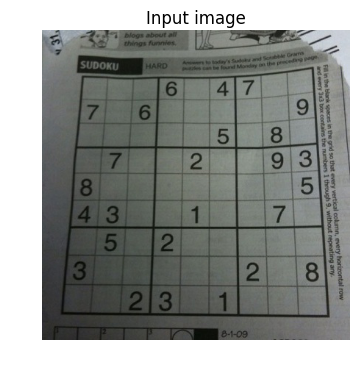

In [2]:
# Input image
img = cv2.imread('../images/sudoku.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Input image'); plt.axis('off');

In [3]:
# First perform Canny edge detection to use as the input
# Note that the output `canny_edges` is in grayscale(single-channel)
canny_edges = cv2.Canny(img, 50, 100)

# Then find lines with Hough transform
lines = cv2.HoughLines(canny_edges, 1, np.pi/180, 200)
print("rho theta")
print(lines)
print(lines.shape)

rho theta
[[[  2.71000000e+02   1.57079637e+00]]

 [[  2.68000000e+02   1.57079637e+00]]

 [[  2.26000000e+02   0.00000000e+00]]

 [[  1.95000000e+02   1.74532924e-02]]

 [[  1.62000000e+02   3.49065848e-02]]

 [[  1.59000000e+02   3.49065848e-02]]

 [[ -2.62000000e+02   3.12413931e+00]]

 [[  1.93000000e+02   1.74532924e-02]]

 [[ -2.93000000e+02   3.10668612e+00]]

 [[  2.28000000e+02   0.00000000e+00]]

 [[  1.62000000e+02   1.57079637e+00]]

 [[  6.20000000e+01   8.72664601e-02]]

 [[ -2.95000000e+02   3.10668612e+00]]

 [[ -2.59000000e+02   3.12413931e+00]]

 [[  5.90000000e+01   8.72664601e-02]]

 [[  6.40000000e+01   1.04719758e-01]]

 [[ -3.78000000e+02   3.07177949e+00]]

 [[  1.28000000e+02   5.23598790e-02]]

 [[  1.59000000e+02   1.57079637e+00]]

 [[ -3.27000000e+02   3.08923268e+00]]

 [[  3.48000000e+02   1.57079637e+00]]

 [[  1.29000000e+02   1.57079637e+00]]]
(22, 1, 2)


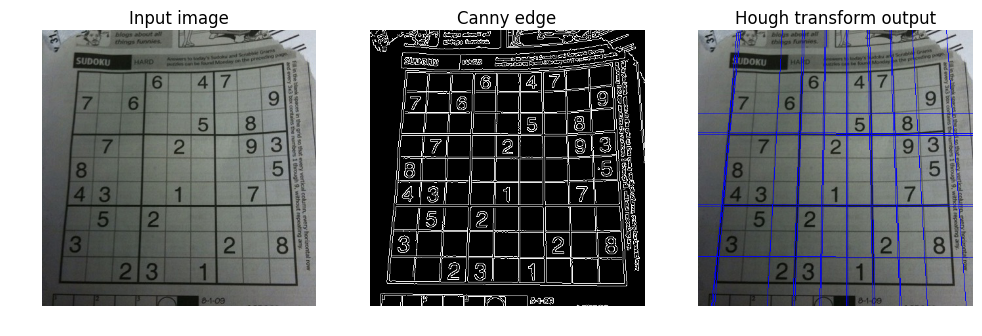

In [4]:
# Draw the output on the (copy of the) input image
output = np.copy(img)

for i in range(len(lines)):
    rho, theta = lines[i][0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c*rho
    y0 = s*rho
    # Endpoints that are roughly outside of the image
    x1 = int(x0 + 1000*(-s))
    y1 = int(y0 + 1000*(c))
    x2 = int(x0 - 1000*(-s))
    y2 = int(y0 - 1000*(c))
    cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Input image'); plt.axis('off');
plt.subplot(1, 3, 2)
plt.imshow(canny_edges, cmap='gray', vmin=0, vmax=255); plt.title('Canny edge'); plt.axis('off');
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); plt.title('Hough transform output'); plt.axis('off');

---

## 2. Hough Circle Transform

`circles = cv2.HoughCircles(image, method, dp, minDist, circles=None, param1=, param2=, minRadius=, maxRadius=)`

- `image`: A 8-bit, single-channel input image
- `method`: The method to perform Hough circle transform, Currently, only `cv2.HOUGH_GRADIENT` is available.
- `dp`: Inverse ratio of the accumulator resolution to the image resolution. If `dp=2`, the accumulator has half as big width and height.
- `minDist`: Minimum distance between the centers of the detected circles. 
- `circles`: The output circle, if you have allocated beforehand.
- `param1`: First parameter. If `method` is `cv2.HOUGH_GRADIENT`, it is the higher threshold for canny edge detector(the lower one is twice smaller).
- `param2`: Second parameter. If `method` is `cv2.HOUGH_GRADIENT`, it is the accumulator threshold for the circle centers at the detection stage.
- `minRadius`: Minimum circle radius
- `maxRadius`: Maximum circle radius


Note that since the only method used is **Hough Gradient Method**, so the canny edge detection is performed inside `cv2.HoughCircles()` function.

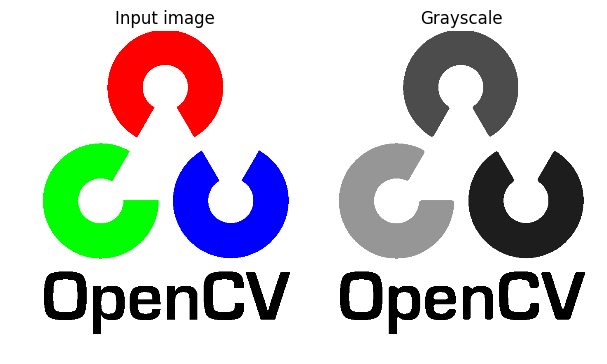

In [5]:
# The input image
img = cv2.imread('../images/opencv_logo2.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
img_gray = cv2.medianBlur(img_gray, 9)

plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Input image'); plt.axis('off');
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255); plt.title('Grayscale'); plt.axis('off');

In [6]:
# Hough circle transform
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 50,
                            param1=100, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

print("x_center y_center radius")
print(circles)
print(circles.shape)

x_center y_center radius
[[[252 662  27]
  [456 420 135]
  [136 420 133]
  [166 672  32]
  [438 656  51]
  [298 140 140]
  [ 58 656  50]
  [346 652  32]]]
(1, 8, 3)


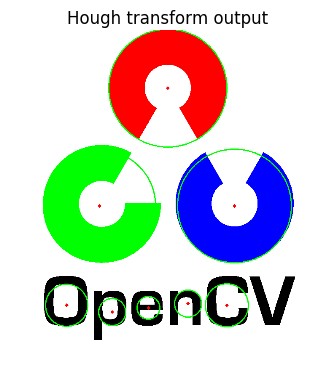

In [7]:
# Draw output
output = np.copy(img)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); plt.title('Hough transform output'); plt.axis('off');

---

## Practice: Coin Removal

Given image of coins on a table, detect the coins and remove them.

- Detect circles on the image using `cv2.HoughCircles()` method.
- Fill the circles with the same color as the surrounding background using `cv2.circle()` method.  
(You can adjust the various parameters to get better results.)

Here's the input and a sample output:

<img src="../images/coins_results.jpg" width="600">

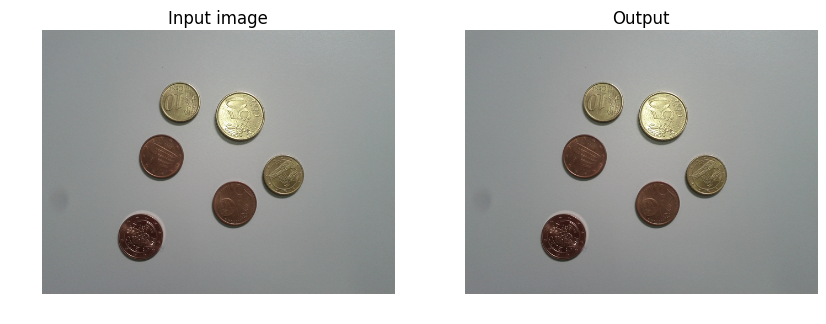

In [8]:
# Read Input
img = cv2.imread('../images/coins.png', cv2.IMREAD_COLOR)
# ============ YOUR CODE HERE ============
# Detect circles on the image

# ========================================

output = np.copy(img)
# ============ YOUR CODE HERE ============
# Remove coins in the output image

# ========================================

# Plot results
plt.figure(figsize=(10, 4));
plt.subplot(1, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB));